## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

## Read S&P 500 historical data
if your historical data is not in the same file please change the filename.
Historical data should contain date, open, high, low, close.
Columns should be coma separated

In [2]:
sp500 = pd.read_csv('sp500_historical.csv.gz', sep=',')
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.set_index('Date', inplace=True)
sp500.tail(5)

,open,high,low,close,volume,adj_close
Date,,,,,,
2017-08-23,2444.879883,2448.909912,2441.419922,2444.040039,2444.040039,2.785290e+09
2017-08-24,2447.909912,2450.389893,2436.189941,2438.969971,2438.969971,2.846590e+09
2017-08-25,2444.719971,2453.959961,2442.219971,2443.050049,2443.050049,2.588780e+09
2017-08-28,2447.350098,2449.120117,2439.030029,2444.239990,2444.239990,2.677700e+09
2017-08-29,2431.939941,2449.189941,2428.199951,2446.300049,2446.300049,2.737580e+09


## Going to calendar days
Trading days are different each year and a consequence is that the number of days in a particular month varies accross years.

One way to get around that is to go for calendar days.


In [3]:
# Create a calendar index
calendar_idx = pd.date_range(start=sp500.index[0], end=sp500.index[-1], freq='D')
# Create calendar day closes, non trading days are NaN
cd_closes = pd.DataFrame(sp500[["close"]], index=calendar_idx)
# Fill NaN with previous close
cd_closes.fillna(method="ffill", inplace=True)

## Creating days and months columns

In [4]:
# Create month and day of month
cd_closes["year"] = cd_closes.index.year
cd_closes["month"] = cd_closes.index.month
cd_closes["day"] = cd_closes.index.day

## Normalizing by the 1st day of the month

In [5]:
# Create column containing the close of the first day of each month
cd_closes.loc[cd_closes["day"] == 1, "first_day"] = cd_closes["close"]
cd_closes["first_day"].fillna(method="ffill", inplace=True)
# If NaN remains in first_day columns this means a month is not complete
# So we drop it
cd_closes.dropna(inplace=True)
# Now create a normalized close
cd_closes["normed_close"] = cd_closes.close / cd_closes.first_day - 1
cd_closes

,close,year,month,day,first_day,normed_close
1928-02-01,17.530000,1928,2,1,17.530000,0.000000
1928-02-02,17.630000,1928,2,2,17.530000,0.005705
1928-02-03,17.400000,1928,2,3,17.530000,-0.007416
1928-02-04,17.400000,1928,2,4,17.530000,-0.007416
1928-02-05,17.400000,1928,2,5,17.530000,-0.007416
1928-02-06,17.450000,1928,2,6,17.530000,-0.004564
1928-02-07,17.440000,1928,2,7,17.530000,-0.005134
1928-02-08,17.490000,1928,2,8,17.530000,-0.002282
1928-02-09,17.550000,1928,2,9,17.530000,0.001141
1928-02-10,17.540000,1928,2,10,17.530000,0.000570


## Grouping per month and day 

In [6]:
# cd_closes contain closing prices for each calendar day 
cd_closes.sort_values(by=["year", "month"], ascending=True, inplace=True)
monthly_groups = cd_closes[["month", "day", "normed_close"]].groupby(by=["month", "day"])

## Building moving averages

In [7]:
# Exponential moving average
ema_seasonals = monthly_groups.apply(lambda x: x.ewm(span=20).mean())
# Simple moving average using a rolling window
sma_seasonals = monthly_groups.apply(lambda x: x.rolling(20, min_periods=1).mean())
# Full average
full_seasonals = monthly_groups.mean()

## Display all seasonals

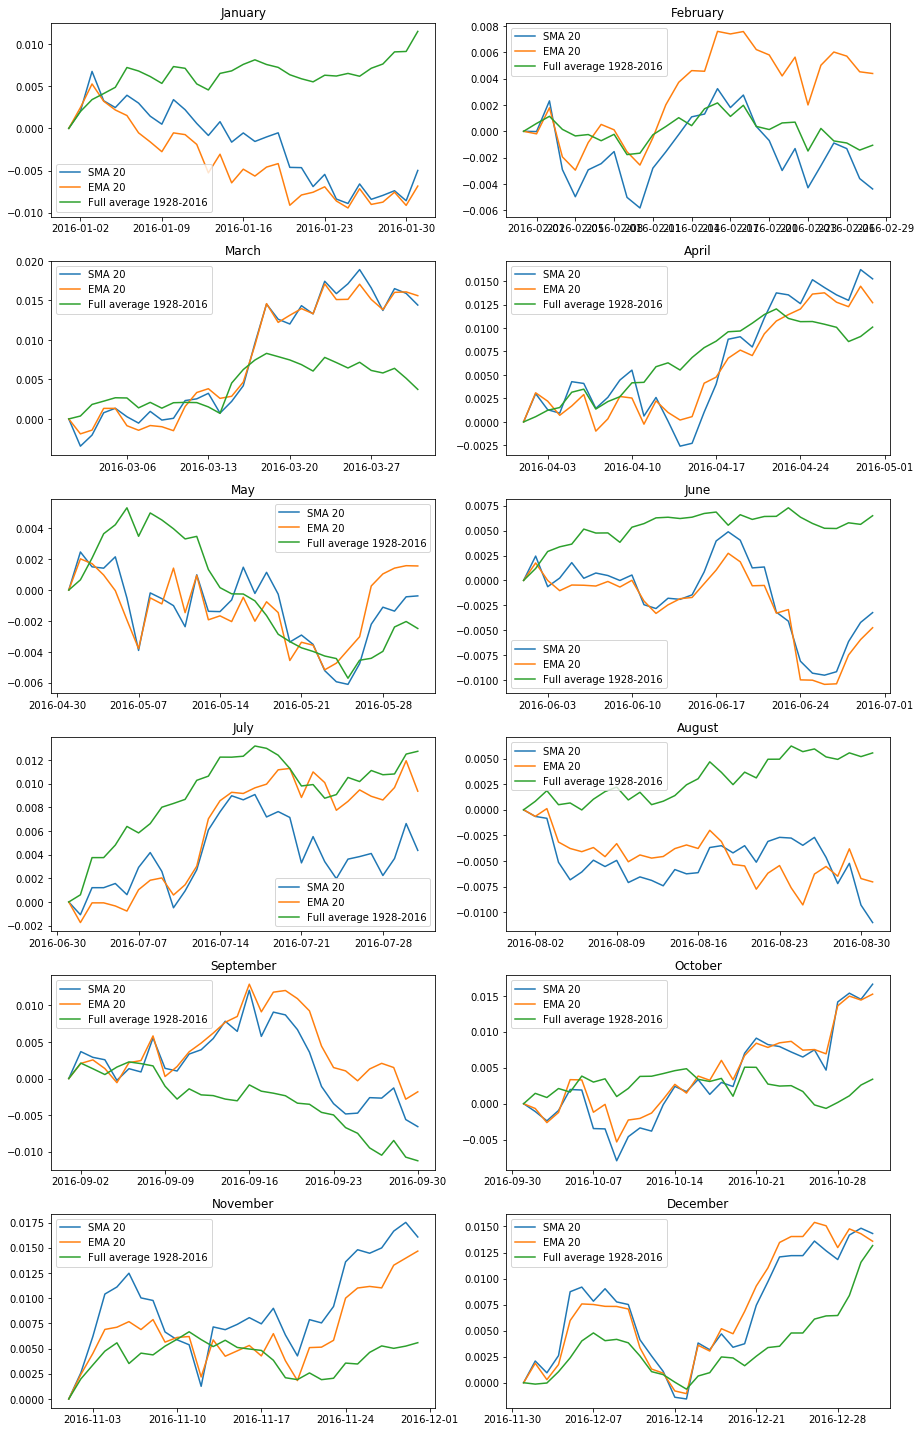

In [14]:
sma_seasonals['year'] = sma_seasonals.index.year
gs = gridspec.GridSpec(6, 2)
plt.figure(figsize=(13,20))
months = ['January', "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
for i in range(12):
    ax = plt.subplot(gs[int(i/2), i % 2])
    ax.set_title(months[i])
    the_filter = (sma_seasonals.year==2016) & (sma_seasonals.month==i+1)
    if i == 1: # February usually has 28 days...
        ax.plot(sma_seasonals.loc[the_filter, "normed_close"][:28])
        ax.plot(ema_seasonals.loc[the_filter, "normed_close"][:28])
        ax.plot(ema_seasonals.loc[the_filter].index[:28], full_seasonals.loc[i+1][:28])
        ax.legend(["SMA 20", "EMA 20", "Full average 1928-2016"])
    else:
        ax.plot(sma_seasonals.loc[the_filter, "normed_close"])
        ax.plot(ema_seasonals.loc[the_filter, "normed_close"])
        ax.plot(ema_seasonals.loc[the_filter].index, full_seasonals.loc[i+1])
        ax.legend(["SMA 20", "EMA 20", "Full average 1928-2016"])
plt.tight_layout()